In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data_k_mean.txt', sep=' ', names=['x', 'y'])
df

,x,y
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


In [5]:
# Function to calculate the Euclidean distance between two points
def calculate_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [6]:
# K-Means clustering algorithm
def run_kmeans(data, num_clusters=2, iterations=100):
    np.random.seed(42)
    initial_centroids_idx = np.random.choice(len(data), num_clusters, replace=False)
    centroids = data[initial_centroids_idx]
    assigned_clusters = np.zeros(len(data))

    for it in range(iterations):
        # Assign each data point to the nearest centroid
        for i, point in enumerate(data):
            dist = [calculate_distance(point, c) for c in centroids]
            assigned_clusters[i] = np.argmin(dist)

        # Recalculate centroids based on the mean of assigned points
        updated_centroids = np.zeros((num_clusters, data.shape[1]))
        for cluster_id in range(num_clusters):
            points_in_cluster = data[assigned_clusters == cluster_id]
            if len(points_in_cluster) > 0:
                updated_centroids[cluster_id] = np.mean(points_in_cluster, axis=0)

        # Check for convergence
        if np.all(updated_centroids == centroids):
            print(f"Converged in {it} iterations")
            break

        centroids = updated_centroids

    return centroids, assigned_clusters


In [7]:
# Function to visualize the clusters and centroids
def visualize_clusters(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    cluster_colors = ['b', 'm']

    for cluster_id in range(len(centroids)):
        points = data[clusters == cluster_id]
        plt.scatter(points[:, 0], points[:, 1], c=cluster_colors[cluster_id], label=f'Cluster {cluster_id + 1}')

    plt.title('K-Means Clustering Visualization')
    plt.legend()
    plt.show()

Converged in 3 iterations


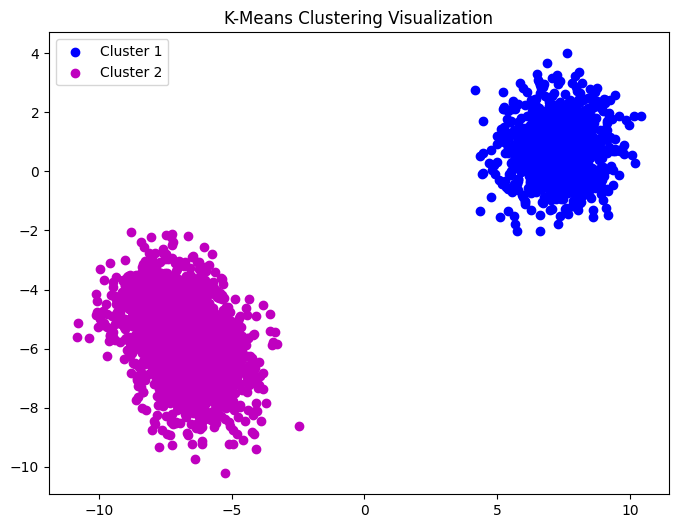

In [8]:
# Convert the dataframe to a NumPy array
data_points = df.to_numpy()

# Run K-Means and plot the results
final_centroids, final_clusters = run_kmeans(data_points, num_clusters=2)
visualize_clusters(data_points, final_clusters, final_centroids)